<a href="https://colab.research.google.com/github/titocampos/estudo-crm/blob/master/Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Augmentation

Trabalhando em arquiteturas de redes neurais profundas nem sempre temos uma quantidade balanceada de exemplos para utilizar em treinamento. Com isso a distribuição dos dados se torna prejudicada e o modelo pode se tornar tendencioso, ou seja, o modelo funcionará melhor para a classe que contiver mais exemplos.

Esse problema é observado não apenas nos conjuntos de dados de imagem, mas também em qualquer tipo de conjunto de dados. Pode ser um dado tabular, como o conjunto de dados do classificador de e-mail de spam, que possui amostras pertencentes a duas classes, spam / falso e original. Em uma situação de desequilíbrio de classe, o conjunto de dados pode ter milhares de amostras na classe de spam e apenas centenas de amostras na classe de email original. Com esse conjunto de dados, nenhum algoritmo de aprendizado de máquina poderia aprender. Técnicas como resampling, SMOTE são usadas para superar essa limitação.

## Re-sampling

A re-amostragem é uma técnica muito utilizada para resolver o problema de distorção de classe em dados tabulares. Utilizando, subamostra ou superamostra dos dados disponíveis para atender aos requisitos de distribuição de classes.

Vamos criar um conjunto de dados sintético com 1000 amostras com duas classes e dois recursos. 95% na classe 0 e 5% na classe 1.

In [0]:
# Importando bibliotecas
from sklearn.datasets import make_classification
import numpy as np
from sklearn.utils import resample

n_samples = 1000
weights = (0.95, 0.05)

# Criando o dataset com 1000 exemplos
X, y = make_classification(n_samples = n_samples, n_features = 2, n_redundant = 0, weights = weights, random_state = 1000)

# Re-sampling
X_1_resampled = resample(X[y == 1], n_samples = X[y == 0].shape[0], random_state = 1000) #Up-smapling 

#Concatenando datasets.
Xu = np.concatenate ((X[y == 0], X_1_resampled))
yu = np.concatenate ((y[y == 0], np.ones(shape = (X[y ==0].shape[0]), dtype = np.int32)))

E, finalmente, temos Xu com amostras de número igual na classe 0 (Xu[yu == 0]) e na classe 1 (Xu [yu == 1]).

In [22]:
print(Xu[yu == 0].shape, Xu[yu == 1].shape)

(946, 2) (946, 2)


## SMOTE

SMOTE (Synthetic Minority Over-sampling TEchnique) é um outro método para resolver o problema de distorção de classe. Diferentemente das técnicas de re-amostragem, os dados disponíveis não são reutilizados aqui. Em vez disso, novas amostras de dados sintéticos são geradas usando o relacionamento entre as amostras.

Usaremos os mesmos dados desbalanceados (X, y) anteriores para obter um conjunto de dados resolvido.

In [18]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 1000)
X_resampled, y_resampled = smote.fit_sample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [23]:
print(X_resampled[y_resampled == 0].shape, X_resampled[y_resampled == 1].shape)

(946, 2) (946, 2)


## Imagens

No caso de imagens de uma unica imagem obtemos varias outras, aplicamos algumas técnicas de transformação, tais como, deslocamento à direita, deslocamento à esquerda e zoom. Versões transformadas de imagens no conjunto de dados de treinamento que pertencem à mesma classe que a imagem original são criadas neste processo.

In [27]:
!wget https://raw.githubusercontent.com/titocampos/estudo-crm/master/datasets/simple_image.jpeg

--2020-03-18 18:58:10--  https://raw.githubusercontent.com/titocampos/estudo-crm/master/datasets/simple_image.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 158509 (155K) [image/jpeg]
Saving to: ‘simple_image.jpeg’

simple_image.jpeg   100%[===================>] 154.79K  --.-KB/s    in 0.02s   

2020-03-18 18:58:10 (6.80 MB/s) - ‘simple_image.jpeg’ saved [158509/158509]



TensorFlow is already loaded. Please restart the runtime to change versions.


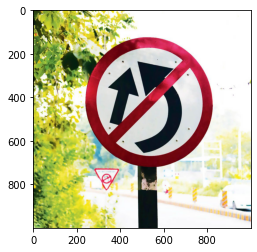

In [29]:
%tensorflow_version 2.x 
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import cv2
from PIL import Image
%matplotlib inline
image = Image.open('simple_image.jpeg')
plt.imshow(image)
plt.show();

Primeiramente, aplicaremos a transformação de deslocamento horizontal e vertical.

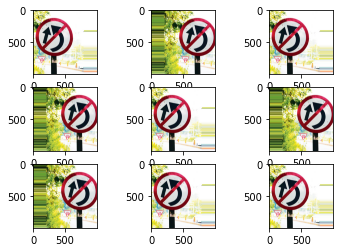

In [30]:
#Random horizontal shift
datagen = ImageDataGenerator()
data = img_to_array(image)
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(width_shift_range=[-200,200])
it = datagen.flow(samples, batch_size=1)
for i in range(9):
  plt.subplot(330 + 1 + i)
  batch = it.next()
  image1 = batch[0].astype('uint8')
  plt.imshow(image1)
plt.show();

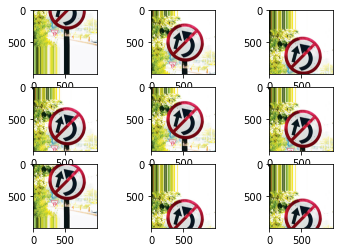

In [31]:
#Vertical shift
data = img_to_array(image)
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(height_shift_range=0.5)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
  plt.subplot(330 + 1 + i)
  batch = it.next()
  image2 = batch[0].astype('uint8')
  plt.imshow(image2)
plt.show();

As próximas transformações são rotação e ajuste do brilho.

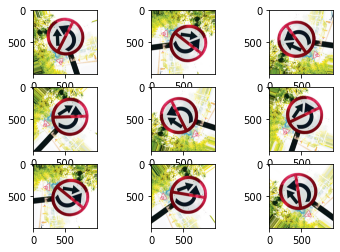

In [32]:
#Rotation
data = img_to_array(image)
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(rotation_range=90)  #Specify angle of rotation
it = datagen.flow(samples, batch_size=1)
for i in range(9):
  plt.subplot(330 + 1 + i)
  batch = it.next()
  image4 = batch[0].astype('uint8')
  plt.imshow(image4)
plt.show();

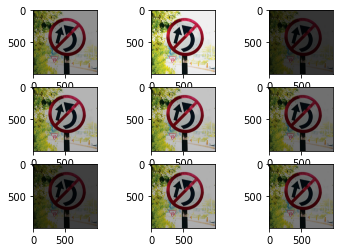

In [33]:
#brightness adjustment
data = img_to_array(image)
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(brightness_range=[0.2,1.0]) 
it = datagen.flow(samples, batch_size=1)
for i in range(9):
  plt.subplot(330 + 1 + i)
  batch = it.next()
  image5 = batch[0].astype('uint8')
  plt.imshow(image5)
plt.show();

Por último demonstraremos o Zooming.

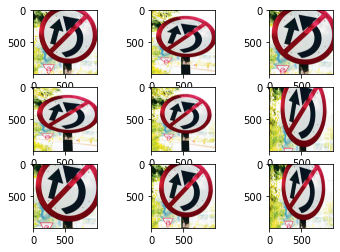

In [34]:
#Zooming
data = img_to_array(image)
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(zoom_range=[0.5,1.0]) 
it = datagen.flow(samples, batch_size=1)
for i in range(9):
  plt.subplot(330 + 1 + i)
  batch = it.next()
  image6 = batch[0].astype('uint8')
  plt.imshow(image6)
plt.show()

Nota: Nem sempre a aplicação de uma transformação é possível, por exemplo, a  inversão vertical de um sinal de trânsito não produzirá uma saída sensata. Um sinal de trânsito invertido verticalmente não é algo do qual o modelo de aprendizado de máquina possa inferir informações. Portanto, aplique essas transformações com sabedoria, conforme seu conjunto de dados.